# Import Libraries

In [1]:
cd D:\zzCoursera proj\Neural network visualizer webapp

D:\zzCoursera proj\Neural network visualizer webapp


In [2]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Download Data

In [4]:
(x_train,y_train) , (x_test,y_test) = tf.keras.datasets.mnist.load_data()

# Plot Examples

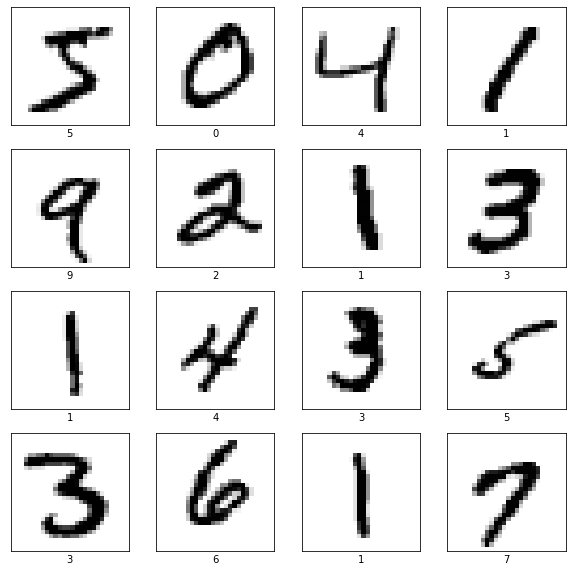

In [5]:
plt.figure(figsize=(10,10))

for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i],cmap='binary')
    plt.xlabel(str(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

# Normalize Data

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train = np.reshape(x_train , (60000,28*28))
x_test = np.reshape(x_test , (10000,28*28))

In [10]:
x_train = x_train/255.
x_test = x_test/255.

In [12]:
x_train[0].shape

(784,)

# Create a Neural Network Model

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32,activation = 'sigmoid', input_shape = (784,)),
    tf.keras.layers.Dense(32,activation = 'sigmoid'),
    tf.keras.layers.Dense(10,activation = 'softmax')                    
                          
])

model.compile(
loss = 'sparse_categorical_crossentropy',
optimizer = 'adam',
    metrics = ['accuracy']
)

# Train the Model

In [14]:
_ = model.fit(

x_train , y_train,
    validation_data = (x_test , y_test),
    epochs = 20 , batch_size = 2048,
    verbose =2 

)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 1s - loss: 2.3994 - accuracy: 0.1062 - val_loss: 2.2310 - val_accuracy: 0.1395
Epoch 2/20
60000/60000 - 1s - loss: 2.1488 - accuracy: 0.3137 - val_loss: 2.0543 - val_accuracy: 0.4346
Epoch 3/20
60000/60000 - 1s - loss: 1.9762 - accuracy: 0.5249 - val_loss: 1.8796 - val_accuracy: 0.6118
Epoch 4/20
60000/60000 - 1s - loss: 1.7935 - accuracy: 0.6330 - val_loss: 1.6874 - val_accuracy: 0.6746
Epoch 5/20
60000/60000 - 1s - loss: 1.6016 - accuracy: 0.7001 - val_loss: 1.4969 - val_accuracy: 0.7333
Epoch 6/20
60000/60000 - 1s - loss: 1.4174 - accuracy: 0.7463 - val_loss: 1.3203 - val_accuracy: 0.7733
Epoch 7/20
60000/60000 - 1s - loss: 1.2516 - accuracy: 0.7846 - val_loss: 1.1657 - val_accuracy: 0.8041
Epoch 8/20
60000/60000 - 1s - loss: 1.1079 - accuracy: 0.8098 - val_loss: 1.0332 - val_accuracy: 0.8270
Epoch 9/20
60000/60000 - 1s - loss: 0.9857 - accuracy: 0.8283 - val_loss: 0.9212 - val_accuracy: 0.8431
Epoch 10/20
60

# Save the Model

In [15]:
model.save('model.h5')

# ML Server

In [35]:
%%writefile ml_server.py

import json
import tensorflow as tf
import numpy as np
import random 

from flask import Flask ,request

app = Flask(__name__)

model = tf.keras.models.load_model('model.h5')
feature_model = tf.keras.models.Model(

    model.inputs,
    [layer.output for layer in model.layers]

)

_,(x_test,_) = tf.keras.datasets.mnist.load_data()
x_test = x_test /255.

def get_prediction():
    index = np.random.choice(x_test.shape[0])
    image = x_test[index,:,:]
    image_arr = np.reshape(image,(1,784))
    return feature_model.predict(image_arr),image

@app.route('/' , methods =['GET','POST'])
def index():
    if request.method =='POST':
        preds , image = get_prediction()
        final_preds = [p.tolist() for p in preds]
        return json.dumps({
            'prediction' :final_preds,
            'image': image.tolist()
        })
    return 'Welcome to model server!'
if __name__ == '__main__':
    app.run()

Overwriting ml_server.py


# Streamlit Web App

In [39]:
%%writefile app.py

import streamlit as st
import json
import requests
import matplotlib.pyplot as plt
import numpy as np

URL ='http://127.0.0.1:5000/'

st.title('Neural Network Visualizer')
st.sidebar.markdown('## Input Image')

if st.button('Get random prediction'):
    response = requests.post(URL , data ={})
    response = json.loads(response.text)
    preds = response.get('prediction')
    image = response.get('image')
    image = np.reshape(image,(28,28))
    
    st.sidebar.image(image , width = 150)
    
    for layer ,p in enumerate(preds):
        numbers = np.squeeze(np.array(p))
        plt.figure(figsize =(32,4))
        
        if layer == 2:
            row = 1
            col = 10
        else:
            row = 2 
            col = 16
            
        for i,number in enumerate(numbers):
            plt.subplot(row,col,i+1)
            plt.imshow(number * np.ones((8,8,3)).astype('float32'))
            plt.xticks([])
            plt.yticks([])
            
            if layer == 2:
                plt.xlabel(str(i) , fontsize=40)
        
        plt.subplots_adjust(wspace=0.05 ,hspace=0.05)
        plt.tight_layout()
        st.text('Layer {}'.format(i+1))
        st.pyplot()

Overwriting app.py
